In [1]:
from fish_helpers import *
import time
from functools import partial
from multiprocessing import Pool
import pylab as pl
from IPython import display
import tqdm.notebook as tqdm
import math
import random
import operator
import sys
import shutil
import matplotlib._color_data as mcd
base_path = '/bigstore/GeneralStorage/Zach/MERCI/Autism/'
if not os.path.exists(base_path):
    os.mkdir(base_path)

In [2]:
# MeA_AllCells_DGE = pd.read_csv(os.path.join(base_path,'MeA_AllCells_DGE.csv'),index_col=0)
# MeA_AllCells_DGE.astype('int32')
# MeA_AllCells_DGE_SizeNorm = (10**5)*(MeA_AllCells_DGE/np.sum(MeA_AllCells_DGE,axis=0))
# del MeA_AllCells_DGE
# MeA_AllCells_DGE_SizeNorm = MeA_AllCells_DGE_SizeNorm.astype('float32')
# MeA_AllCells_DGE_SizeNorm.head()

In [3]:
# pickle.dump(MeA_AllCells_DGE_SizeNorm,open(os.path.join(base_path,'MeA_AllCells_DGE_SizeNorm.pkl'),'wb'))

In [9]:
MeA_AllCells_DGE_SizeNorm.head()

,GGATAGTCCAGA_M1_N,TAACGACATTCG_M1_N,CGTTCGTTCGAC_M1_N,CTGCAGTATTTT_M1_N,CCTATGGGGATA_M1_N,TAGCGATTCTTG_M1_N,AATGACGTATAG_M1_N,ATATACTAACTT_M1_OL,AGTATCTTTATT_M1_N,CCGGTTAAGCTT_M1_OL,...,GTGGTTGAACAG_F7_AS,AGATCCTTTAGA_F7_OL,GCGGTCGCGTTA_F7_N,GAATTAGGTGCT_F7_AS,GTCTTTGCGAGT_F7_N,GAGTGTAGTCGN_F7_AS,CATGAAGATGCC_F7_N,CGATCGAGATAA_F7_N,ATACTGTTAGCT_F7_AS,TCTCTAATCAAA_F7_AS
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610007N19Rik,0.000000,2.940139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,4.763095,14.700694,5.318772,0.000000,12.108370,11.922859,6.307557,14.189932,5.269814,26.857655,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,9.526191,8.820416,12.410467,0.000000,6.054185,5.961430,3.153778,7.094966,0.000000,2.984184,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,14.289287,23.521111,12.410467,12.528189,15.135463,20.865004,22.076448,7.094966,21.079258,23.873470,...,0.0,0.0,0.0,367.647064,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
MeA_AllCells_DGE_SizeNorm.min()

GGATAGTCCAGA_M1_N         0.0
TAACGACATTCG_M1_N         0.0
CGTTCGTTCGAC_M1_N         0.0
CTGCAGTATTTT_M1_N         0.0
CCTATGGGGATA_M1_N         0.0
TAGCGATTCTTG_M1_N         0.0
AATGACGTATAG_M1_N         0.0
ATATACTAACTT_M1_OL        0.0
AGTATCTTTATT_M1_N         0.0
CCGGTTAAGCTT_M1_OL        0.0
GCTAGAACTTCG_M1_N         0.0
CGCCAGTAAATA_M1_OPC-OL    0.0
TCTCGTATGTCC_M1_OPC       0.0
CTGCACGACACA_M1_N         0.0
GAGTCTTTATTT_M1_OPC       0.0
CAACCCATATGA_M1_EN        0.0
AGGATGGTCTTC_M1_OPC       0.0
GATCTTGAGAGT_M1_OPC       0.0
GTAGTCGCGTCA_M1_N         0.0
CCATTTCGCGTT_M1_OL        0.0
CGCCATTAATCT_M1_OPC       0.0
CCGTATTGGTGA_M1_OPC-OL    0.0
CCACGCATGGGG_M1_N         0.0
AATTACTTACTA_M1_OPC-OL    0.0
ACTCCGCCTTCT_M1_EN        0.0
ATTAGAGGAAGN_M1_EN        0.0
CCTAACTACGCG_M1_OL        0.0
CCCGCCTTGGTC_M1_MU        0.0
TACGCCCAACCC_M1_EN        0.0
GCTACAAGCTCT_M1_OPC-OL    0.0
                         ... 
CGCGACAGGGGC_F7_AS        0.0
ATCATCAACTCC_F7_N         0.0
AGTAGAACGT

In [13]:
max_MeA_AllCells_DGE_SizeNorm = np.max(MeA_AllCells_DGE_SizeNorm,axis=0) 
max_MeA_AllCells_DGE_SizeNorm.head()

GGATAGTCCAGA_M1_N    1312.232788
TAACGACATTCG_M1_N    1411.266602
CGTTCGTTCGAC_M1_N     620.523376
CTGCAGTATTTT_M1_N     899.523926
CCTATGGGGATA_M1_N    1065.536499
dtype: float32

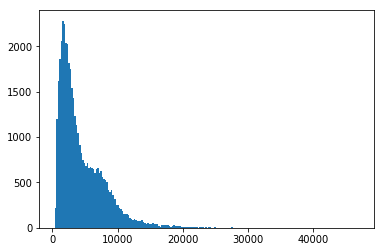

In [14]:
plt.hist(max_MeA_AllCells_DGE_SizeNorm,bins=200)
plt.show()

In [ ]:
plt.hist(np.sum(MeA_AllCells_DGE_SizeNorm,axis=0),bins=200)
plt.show()

In [4]:
MeA_AllCells_DGE_SizeNorm = pickle.load(open(os.path.join(base_path,'MeA_AllCells_DGE_SizeNorm.pkl'),'rb'))
MeA_AllCells_DGE_SizeNorm = MeA_AllCells_DGE_SizeNorm.astype('float32')
MeA_AllCells_DGE_SizeNorm.head()

,GGATAGTCCAGA_M1_N,TAACGACATTCG_M1_N,CGTTCGTTCGAC_M1_N,CTGCAGTATTTT_M1_N,CCTATGGGGATA_M1_N,TAGCGATTCTTG_M1_N,AATGACGTATAG_M1_N,ATATACTAACTT_M1_OL,AGTATCTTTATT_M1_N,CCGGTTAAGCTT_M1_OL,...,GTGGTTGAACAG_F7_AS,AGATCCTTTAGA_F7_OL,GCGGTCGCGTTA_F7_N,GAATTAGGTGCT_F7_AS,GTCTTTGCGAGT_F7_N,GAGTGTAGTCGN_F7_AS,CATGAAGATGCC_F7_N,CGATCGAGATAA_F7_N,ATACTGTTAGCT_F7_AS,TCTCTAATCAAA_F7_AS
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610007N19Rik,0.000000,2.940139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,4.763095,14.700694,5.318772,0.000000,12.108370,11.922859,6.307557,14.189932,5.269814,26.857655,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,9.526191,8.820416,12.410467,0.000000,6.054185,5.961430,3.153778,7.094966,0.000000,2.984184,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,14.289287,23.521111,12.410467,12.528189,15.135463,20.865004,22.076448,7.094966,21.079258,23.873470,...,0.0,0.0,0.0,367.647064,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cells = []
samples = []
cell_types = []
for cell in MeA_AllCells_DGE_SizeNorm.columns:
    c,s,t = cell.split('_')
    cells.append(cell)
    samples.append(s)
    cell_types.append(t)
np.unique(cell_types)
info_df = pd.DataFrame(index=cells)
info_df['cells'] = cells
info_df['samples'] = samples
info_df['cell_types'] = cell_types
info_df['barcode'] = [i.split('_')[0] for i in info_df['cells']]
info_df

,cells,samples,cell_types,barcode
GGATAGTCCAGA_M1_N,GGATAGTCCAGA_M1_N,M1,N,GGATAGTCCAGA
TAACGACATTCG_M1_N,TAACGACATTCG_M1_N,M1,N,TAACGACATTCG
CGTTCGTTCGAC_M1_N,CGTTCGTTCGAC_M1_N,M1,N,CGTTCGTTCGAC
CTGCAGTATTTT_M1_N,CTGCAGTATTTT_M1_N,M1,N,CTGCAGTATTTT
CCTATGGGGATA_M1_N,CCTATGGGGATA_M1_N,M1,N,CCTATGGGGATA
TAGCGATTCTTG_M1_N,TAGCGATTCTTG_M1_N,M1,N,TAGCGATTCTTG
AATGACGTATAG_M1_N,AATGACGTATAG_M1_N,M1,N,AATGACGTATAG
ATATACTAACTT_M1_OL,ATATACTAACTT_M1_OL,M1,OL,ATATACTAACTT
AGTATCTTTATT_M1_N,AGTATCTTTATT_M1_N,M1,N,AGTATCTTTATT
CCGGTTAAGCTT_M1_OL,CCGGTTAAGCTT_M1_OL,M1,OL,CCGGTTAAGCTT


In [6]:
class GeneImputationClass(object):
    def __init__(self,
                 scmatrix,
                 gene_set,
                 sample_size=0.1,
                 k=10):
        self.scmatrix = scmatrix.copy()
        self.cells = list(scmatrix.columns)
        self.genes = list(scmatrix.index)
        self.gene_set = gene_set.copy()
        self.nbits = len(gene_set.keys())
        self.sample_size = sample_size
        self.k = k
        self.calculate_signal()
        self.calculator_wrapper()
        
    def calculate_signal(self): 
        self.encoding = pd.DataFrame(index=self.cells)
        for bit,species in self.gene_set.items():
            self.encoding[bit] = np.sum(self.scmatrix.loc[species],axis=0)
    
    def calculate_metric(self,knn,distance_df):
        sig = self.scmatrix[knn[0]]
        avg = np.average(self.scmatrix[knn[1:]],axis=1)
#         std = np.std(distance_df.loc[nn],axis=0)
        metric = np.sum((sig-avg)**2)/self.nbits #MSE
        correlation = spearmanr(sig,avg)[0]
        # implement poisson likelihood
        return metric,correlation
    
    def calculate_distance_matrix(self,cell,distance_df):
        sample_vector = distance_df.loc[cell]
        distance_vector = np.sqrt(np.sum((distance_df-sample_vector)**2,axis=1))
        knn = list(distance_vector.sort_values(ascending=True)[:self.k].index)
        return knn
            
    def calculator(self,cell):
        distance_df = self.encoding.copy() #might not be nessisary
        knn = self.calculate_distance_matrix(cell,distance_df)
        metric,correlation = self.calculate_metric(knn,distance_df)
        return metric,correlation
        
    def calculator_wrapper(self):
        cells = random.sample(self.cells,self.sample_size)
        self.metrics = []
        self.correlations = []
        for cell in cells:
            metric,correlation = self.calculator(cell)
            self.metrics.append(metric)
            self.correlations.append(correlation)
        self.metric = np.average(self.metrics) #possibly implenment gradient
        self.correlation = np.average(self.correlations) #possibly implenment gradient
        
        

In [7]:
class OptimizationClass(object):
    def __init__(self,
                 scmatrix,
                 iterations=100,
                 ngenes=50,
                 nbits=18,
                 keepers=10,
                 nblank_genes=200,
                 nblank_cells=100,
                 survivors=[],
                 mutation_rate=0.3,
                 offspring_size=10,
                 sample_size=0.1,
                 k=10,
                 color='r',
                 base_path='',
                 ncpu=1,
                 verbose=True):
        # Add Blanks
        self.iterations = iterations
        self.nblank_genes = nblank_genes
        self.nblank_cells = nblank_cells
        if sys.getsizeof(scmatrix)>3.5*10**9:
            raise ValueError('Matrix is too large, Consider filtering or 32 bit')
        self.scmatrix = scmatrix.copy()
        for i in range(nblank_genes):
            key = 'blank_'+str(i)
            if not key in self.scmatrix.index:
                self.scmatrix.loc['blank_'+str(i)] = 0*self.scmatrix.iloc[0]
        for i in range(nblank_cells):
            key = 'blank_'+str(i)
            if not key in self.scmatrix.columns:
                self.scmatrix['blank_'+str(i)] = 0
        self.genes = list(scmatrix.index)
        self.cells = list(scmatrix.columns)
        self.ngenes = ngenes
        self.nbits = nbits
        self.keepers = keepers
        self.survivors = survivors
        self.mutation_rate = int(self.ngenes*mutation_rate)
        self.offspring_size = offspring_size
        self.sample_size = int(sample_size*len(self.cells))
        self.k = k
        self.color = color
        if base_path == '':
            base_path = os.path.join(os.getcwd(),'Results')
        if os.path.exists(base_path):
            print(base_path)
            print('base_path already exists and will be overwritten')
            shutil.rmtree(base_path)
        os.mkdir(base_path)
        self.base_path = base_path
        self.ncpu = ncpu
        self.verbose = verbose
        
        # keepers is a list
        # gene_set is a dictionary
        # each key is a bit
        # each item is a list of genes
        
    def generate_starting_survivors(self):
        for k in range(self.keepers):
            gene_set = {}
            for b in range(self.nbits):
                gene_set[b] = random.sample(self.genes,self.ngenes)
            self.survivors.append(gene_set)
        self.metrics = []
        self.encodings = []
            
    def generate_offspring(self):
        offspring = []
        for gene_set in self.survivors:
            for i in range(self.offspring_size):
                offspring_gene_set = {}
                for bit,species in gene_set.items():
                    mate = random.sample(self.survivors,1)[0][bit]
                    mix = list(np.unique(list(mate)+list(species)))
                    start = time.time()
                    while len(mix)<self.ngenes:
                        gene = random.sample(self.genes,1)[0]
                        if not gene in mix:
                            mix.append(gene)
                        if time.time()-start>5:
                            print('took too long to make mix >= ngenes',len(mix),self.ngenes)
                            raise ValueError('generate_offspring Failed')
                    offspring_gene_set[bit] = random.sample(mix,self.ngenes)
                offspring.append(offspring_gene_set)
        self.offspring = offspring
        self.progenerators = self.survivors+self.offspring

    def generate_mutations(self):
        mutations = []
        for gene_set in self.progenerators:
            mutant_gene_set = {}
            for bit,species in gene_set.items():
                mutant = list(np.unique(species))
                nkeepers = int(self.ngenes - random.randint(0,self.mutation_rate))
                if nkeepers<1:
                    mutant = []
                elif nkeepers>len(mutant):
                    continue
                else:
                    mutant = random.sample(mutant,nkeepers)
                start = time.time()
                while len(mutant)<self.ngenes:
                    gene = random.sample(self.genes,1)[0]
                    if not gene in mutant:
                        mutant.append(gene)
                    if time.time()-start>5:
                        print('took too long to find gene to mutate',gene)
                        print(self.pos_cells)
                        print('len genes',len(self.genes),self.ngenes,len(mutant))
                        raise ValueError('generate_mutations Failed')
                mutant_gene_set[bit] = mutant
            mutations.append(mutant_gene_set)
        self.mutations = mutations
        self.population = self.offspring+self.mutations

    def populate(self):
        if len(self.survivors)!=self.keepers:
            self.generate_starting_survivors()
        self.generate_offspring()
        self.generate_mutations()
        
    def pfunc(self,gene_set):
        GIC = GeneImputationClass(self.scmatrix,gene_set,sample_size=self.sample_size,k=self.k)
        return gene_set,GIC.metric,GIC.encoding,GIC.correlation
    
    def selection(self):
        metrics = []
        population = []
        encodings = []
        correlations = []
        if len(self.metrics)>0: # dont rerun survivors
            for i in range(self.keepers):
                population.append(self.survivors[i])
                metrics.append(self.metrics[i])
                encodings.append(self.encodings[i])
                correlations.append(self.correlations[i])
        if self.ncpu==1:
            for gene_set in tqdm.tqdm(self.population): #possible parallel place
                gene_set,metric,encoding,correlation = self.pfunc(gene_set)
                metrics.append(metric)
                population.append(gene_set)
                encodings.append(encoding)
                correlations.append(correlation)
        else:
            sys.stdout.flush()
            with Pool(self.ncpu) as p:
                for gene_set,metric,encoding,correlation in tqdm.tqdm(p.imap(self.pfunc,self.population,chunksize=1),total=len(self.population)):
                    metrics.append(metric)
                    population.append(gene_set)
                    encodings.append(encoding)
                    correlations.append(correlation)
            sys.stdout.flush()
        df = pd.DataFrame(index=range(len(self.population)))
        df['population'] = population
        df['metrics'] = metrics
        df['encodings'] = encodings
        df['correlations'] = correlations
        df = df.sort_values('metrics',ascending=True)
        survivors = df.iloc[:self.keepers]
        self.survivors = list(survivors['population'])
        self.metrics = list(survivors['metrics'])
        self.encodings = list(survivors['encodings'])
        self.correlations = list(survivors['correlations'])
        self.elite_survivor = self.survivors[0]
        
    def qc_pfunc(self,cell):
        correlations = []
        distance_df = self.encodings[0]
        distance_vector = np.sqrt(np.sum((distance_df-distance_df.loc[cell])**2,axis=1))
        knn = list(distance_vector.sort_values(ascending=True)[:self.k].index)
        for cell in knn[1:]:
            correlations.append(spearmanr(self.scmatrix[knn[0]],self.scmatrix[cell])[0])
        return correlations
    
    def qc_viewer(self):
        correlations = []
        distance_df = self.encodings[0]
        cells = random.sample(self.cells,self.sample_size)
        for cell in cells:
            distance_vector = np.sqrt(np.sum((distance_df-distance_df.loc[cell])**2,axis=1))
            knn = list(distance_vector.sort_values(ascending=True)[:self.k].index)
            for cell in knn[1:]:
                correlations.append(spearmanr(self.scmatrix[knn[0]],self.scmatrix[cell])[0])
        if self.ncpu==1:
            for cell in tqdm.tqdm(self.population): #possible parallel place
                correlations.extend(self.qc_pfunc(cell))
        else:
            sys.stdout.flush()
            with Pool(self.ncpu) as p:
                for temp_correlations in tqdm.tqdm(p.imap(self.qc_pfunc,cells,chunksize=1),total=len(cells)):
                    correlations.extend(temp_correlations)
            sys.stdout.flush()
        print('Average Correlation:',round(np.average(correlations),4))
        print('Standard Deviation:',round(np.std(correlations),4))
        
    def evolve(self):
        self.X = []
        self.Y = []
        self.max = []
        self.min = []
        start_time = time.time()
        for I in range(self.iterations):
            if self.verbose:
                print('Iteration '+str(I))
            self.populate()
            self.selection()
            pickle.dump(self.elite_survivor,open(os.path.join(self.base_path,str('elite_survivor_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.survivors,open(os.path.join(self.base_path,str('survivors_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.metrics,open(os.path.join(self.base_path,str('metrics_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.encodings,open(os.path.join(self.base_path,str('encodings_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.correlations,open(os.path.join(self.base_path,str('correlations_'+str(I)+'.pkl')),'wb'))
            avg = np.max(self.metrics)
            std = np.std(self.metrics) 
            self.X.append((time.time()-start_time)/(60*60))
            self.Y.append(avg)
            self.max.append(avg+std)
            self.min.append(avg-std)
            if self.verbose:
                pl.plot(self.X,np.log10(self.Y),c='k',linewidth=1)
                pl.fill_between(self.X,np.log10(self.max),np.log10(self.min),color=self.color)
                pl.ylabel('Log10 Max Metric')
                pl.xlabel('Time Hours')
                display.clear_output(wait=True)
                display.display(pl.gcf())
            if I>10:
                if np.average(self.Y[-5:])==self.Y[-1]:
                    break
#             if time.time()-start_time>(60*5):
#                 break
        if self.verbose:
            display.clear_output(wait=True)
            print('Average Correlation:',round(np.average(self.correlations),4))
            print('Standard Deviation:',round(np.std(self.correlations),4))

In [8]:
OClass = OptimizationClass(MeA_AllCells_DGE_SizeNorm.astype('float16'),
                          iterations=100,
                          ngenes=50,
                          nbits=18,
                          keepers=10,
                          nblank_genes=50,
                          nblank_cells=100,
                          survivors=[],
                          mutation_rate=0.3,
                          offspring_size=2,
                          sample_size=1,
                          k=10,
                          color='r',
                          base_path='/bigstore/GeneralStorage/Zach/MERCI/MERGI2',
                          ncpu=30,
                          verbose=True)
OClass.evolve()

/bigstore/GeneralStorage/Zach/MERCI/MERGI2
base_path already exists and will be overwritten
Iteration 0


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy

  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/zach/minicond

  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/

  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Process ForkPoolWorker-12:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process ForkPoolWorker-11:
Traceback (most recent call last):
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing

  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/mul

  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/queues.py", line 334, in

KeyboardInterrupt: 

In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))